<a href="https://colab.research.google.com/github/GurpreetMeelu/ml_from_scratch/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from Scratch**

# Importing the libraries

1. Numpy: For matrix transformation
2. Pandas: For dataframe manupulation
3. Matplotlib: For plotting the charts

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv("https://raw.githubusercontent.com/mohit-baliyan/references/master/salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Plotting the Data

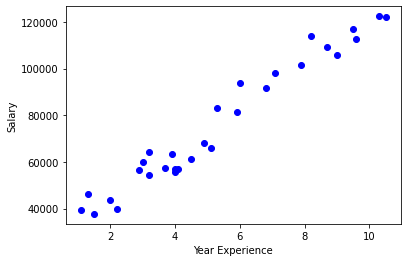

In [283]:
plt.scatter(df.YearsExperience, df.Salary, color = 'blue')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.show()

# Creating a Regression Model

In [302]:
class LinearRegression():

  def __init__(self, learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration
    self.weights = None
    self.bias = None
  

  def fit(self,X, y):
    # No. of Training Examples and Features
    n_samples, n_features = X.shape

    # Initial Parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient Descent
    for _ in range(self.iteration):

      y_predicted = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples)*np.dot(X.T, y_predicted - y)
      db = (1/n_samples)*np.sum(y_predicted - y)

      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db


  def predict(self, X):
    y_approximated = np.dot(X, self.weights) + self.bias
    return y_approximated
  
  def cofficient(self):
    print('Weights',self.weights)
    print('Bias',self.bias)

In [285]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [287]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [288]:
X_train.shape

(24, 1)

In [303]:
reg = LinearRegression(learning_rate=0.001, iteration = 1000)
reg.fit(X_train, y_train)

In [304]:
y_pred = reg.predict(X_test)

In [305]:
reg.cofficient()

Weights [12378.54113312]
Bias 6216.602543075331


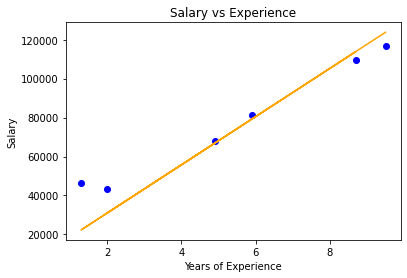

In [306]:
plt.scatter( X_test, y_test, color = 'blue' )
plt.plot( X_test, y_pred, color = 'orange', )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()